## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

## Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


## Layout personal del proyecto

En este apartado se puede encontrar:

- Link directo a mi [google doc](https://docs.google.com/document/d/1nqIqVbWTDQlct2SE-HyeAtVsSHeOA8OGfVq9aoMTrJs/edit?usp=sharing) donde hago un reporte para llevar un control de investigación y desgloce del plantamiento del problema. Es el borrador que utilizo para darle forma a mi proyecto y argumentación sólida

- Enlace a la presentación del proyecto [aquí](https://docs.google.com/presentation/d/1nxL0x9GVU28WsEynaZqYJQwpNiZgpV5feXF12tVysPw/edit?usp=sharing)

- Vínculo a exploración de los datos en Excel [EDA Excel](https://scalamex-my.sharepoint.com/:x:/g/personal/infonoy_dsiac14_bootcamp_ucamp_io/EZ1HGwhfB0JKlANDxv55DEwBKglV8lOTh8gdtmgikilncQ?e=EixqQ3)

- Vínculo al repositorio de [Github](https://github.com/ingridsfd/M7-GENZ-DaScieAI)

## Importación de librerías

In [ ]:
# Importamos las librerias necesarias M1
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#Imps M2
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing   import StandardScaler

#Imps M3
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso, Ridge,LassoCV,RidgeCV
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


#Imps M4
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go

#Reloads
%reload_ext autoreload
%autoreload 2

#Para evitar mensajes de ciertos warnings
import warnings
warnings.filterwarnings("ignore")

## Importación del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
df1 = pd.read_csv(r'/content/drive/MyDrive/Ucamp Cuaderno/Your Career Aspirations of GenZ.csv')
df1.tail(7)

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
228,India,442406,Male,My Parents,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,7,Fully Remote with No option to visit offices,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...","Build and develop a Team, Design and Develop a...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
229,India,605101,Male,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",Yes,Will work for them,10,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Instructor or Exp...","Design and Creative strategy in any company, D...",Manager who sets targets and expects me to ach...,Work with 5 to 6 people in my team
230,India,605008,Male,"People from my circle, but not family members","Yes, I will earn and do that",Will work for 3 years or more,No,Will NOT work for them,7,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Learning by obser...","Design and Creative strategy in any company, B...",Manager who sets goal and helps me achieve it,Work with more than 10 people in my team
231,India,722207,Male,"People from my circle, but not family members",No I would not be pursuing Higher Education ou...,"This will be hard to do, but if it is the righ...",Yes,Will work for them,5,Hybrid Working Environment with less than 3 da...,Employer who rewards learning and enables that...,"Learning by observing others, Trial and error ...","Business Operations in any organization, Look ...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
232,India,604102,Female,People who have changed the world for better,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,4,Hybrid Working Environment with less than 10 d...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...","Design and Creative strategy in any company, B...",Manager who sets goal and helps me achieve it,Work with more than 10 people in my team
233,India,122002,Male,People who have changed the world for better,"Yes, I will earn and do that","No way, 3 years with one employer is crazy",No,Will NOT work for them,7,Hybrid Working Environment with less than 15 d...,Employer who rewards learning and enables that...,"Self Paced Learning Portals, Instructor or Exp...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
234,India,605102,Female,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",Yes,Will work for them,5,Every Day Office Environment,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Instructor or Exp...","Busi

## Limpieza de datos

Verificamos que los datos están completos en todas sus columnas:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

Voy a reenombrar los títulos de las tablas porque están demasiado largos:

In [ ]:
new_col_names = {"Your Current Country.":"country", #columna 0
                 "Your Current Zip Code / Pin Code":"zip_code", #columna 1
                 "Your Gender":"gender", #columna 2
                 "Which of the below factors influence the most about your career aspirations ?":"influence_to_study", #columna 3
                 "Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.":"posgraduate", #columna 4
                 "How likely is that you will work for one employer for 3 years or more ?":"work_3_years", #columna 5
                 "Would you work for a company whose mission is not clearly defined and publicly posted.":"company_mission", #columna 6
                 "How likely would you work for a company whose mission is misaligned with their public actions or even their product ?":"company_values", #columna 7
                 "How likely would you work for a company whose mission is not bringing social impact ?":"social_impact", #columna 8
                 "What is the most preferred working environment for you.":"working_environment", #columna 9
                 "Which of the below Employers would you work with.":"type_employers", #columna 10
                 "Which type of learning environment that you are most likely to work in ?":"type_learning", #columna 11
                 "Which of the below careers looks close to your Aspirational job ?":"type_aspirations", #columna 12
                 "What type of Manager would you work without looking into your watch ?":"type_manager", #columna 13
                 "Which of the following setup you would like to work ?":"type_team", #columna 14
                 }

# Rename all columns except the one with the longest name
df1.rename(columns=new_col_names, inplace=True)

df1.head(6)

,country,zip_code,gender,influence_to_study,posgraduate,work_3_years,company_mission,company_values,social_impact,working_environment,type_employers,type_learning,type_aspirations,type_manager,type_team
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
5,India,768028,Female,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Instructor or Expert Learning Programs, Learni...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              235 non-null    object
 1   zip_code             235 non-null    int64 
 2   gender               235 non-null    object
 3   influence_to_study   235 non-null    object
 4   posgraduate          235 non-null    object
 5   work_3_years         235 non-null    object
 6   company_mission      235 non-null    object
 7   company_values       235 non-null    object
 8   social_impact        235 non-null    int64 
 9   working_environment  235 non-null    object
 10  type_employers       235 non-null    object
 11  type_learning        235 non-null    object
 12  type_aspirations     235 non-null    object
 13  type_manager         235 non-null    object
 14  type_team            235 non-null    object
dtypes: int64(2), object(13)
memory usage: 27.7+ KB


In [ ]:
print(df1.duplicated().sum()) #Aquí verifico que no existan datos duplicados

0


## Análisis Exploratorio de los Datos

La completitud aquí se muestra de 100% para todas las variables del dataframe como también vimos en el apartado 3.0 con df1.info()

In [ ]:
#Aseguramos que no tenemos variables con >80% de completitud
#1. Llamamos a los datos nulos
completitud_verified = pd.DataFrame(df1.isnull().sum())
#2. Reseteamos índices de las columnas
completitud_verified.reset_index(inplace = True)
#3. Renombramos columnas
completitud_verified= completitud_verified.rename(columns = {"index":"columna",0:"total"})
#4. Aplicamos la fórmula de la completitud para crear una nueva columna en % porcentaje
completitud_verified["completitud"] = ((1 - completitud_verified["total"] / df1.shape[0]) * 100) #.round(2) esto quitó los porcentajes
#5. Ordenamos los resultados por valores ascendentes
completitud_verified = completitud_verified.sort_values(by = "completitud", ascending = True)
#6. Reseteamos indices de las filas para mostrar
completitud_verified.reset_index(drop = True, inplace = True)
completitud_verified

#Con el código anterior verificamos que para cada columna no tenemos datos faltantes. Están todos completos

,columna,total,completitud
0,country,0,100.0
1,zip_code,0,100.0
2,gender,0,100.0
3,influence_to_study,0,100.0
4,posgraduate,0,100.0
5,work_3_years,0,100.0
6,company_mission,0,100.0
7,company_values,0,100.0
8,social_impact,0,100.0
9,working_environment,0,100.0


Aquí estoy haciendo una gráfica para ver cómo está la distribución de género entre el total de las personas que llenaron la encuesta.

In [ ]:
# plt.figure(figsize=(15, 4))  # Cambia el tamaño según lo necesites
# # Crear la gráfica de bigotes con Seaborn
# sns.boxplot(x=df1['country'].value_counts(), whis=2.9, width=0.5)

# # Personalizar la apariencia
# plt.title('Gráfico de Bigotes para la variable "country"')
# plt.xlabel('Categorías de País')
# plt.ylabel('Frecuencia')

# # Mostrar la gráfica
# plt.show()

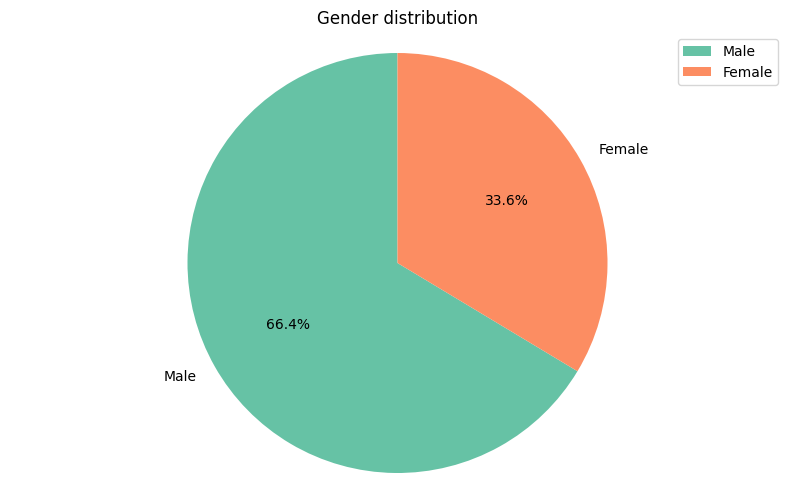

In [ ]:
# Contar los valores únicos en la columna 'gender'
gender_counts = df1['gender'].value_counts()

# Crear la gráfica de pastel con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")  # Seleccionar paleta de colores
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender distribution')
plt.legend()
plt.axis('equal')  # Hacer que el gráfico sea un círculo en lugar de elipse
plt.show()

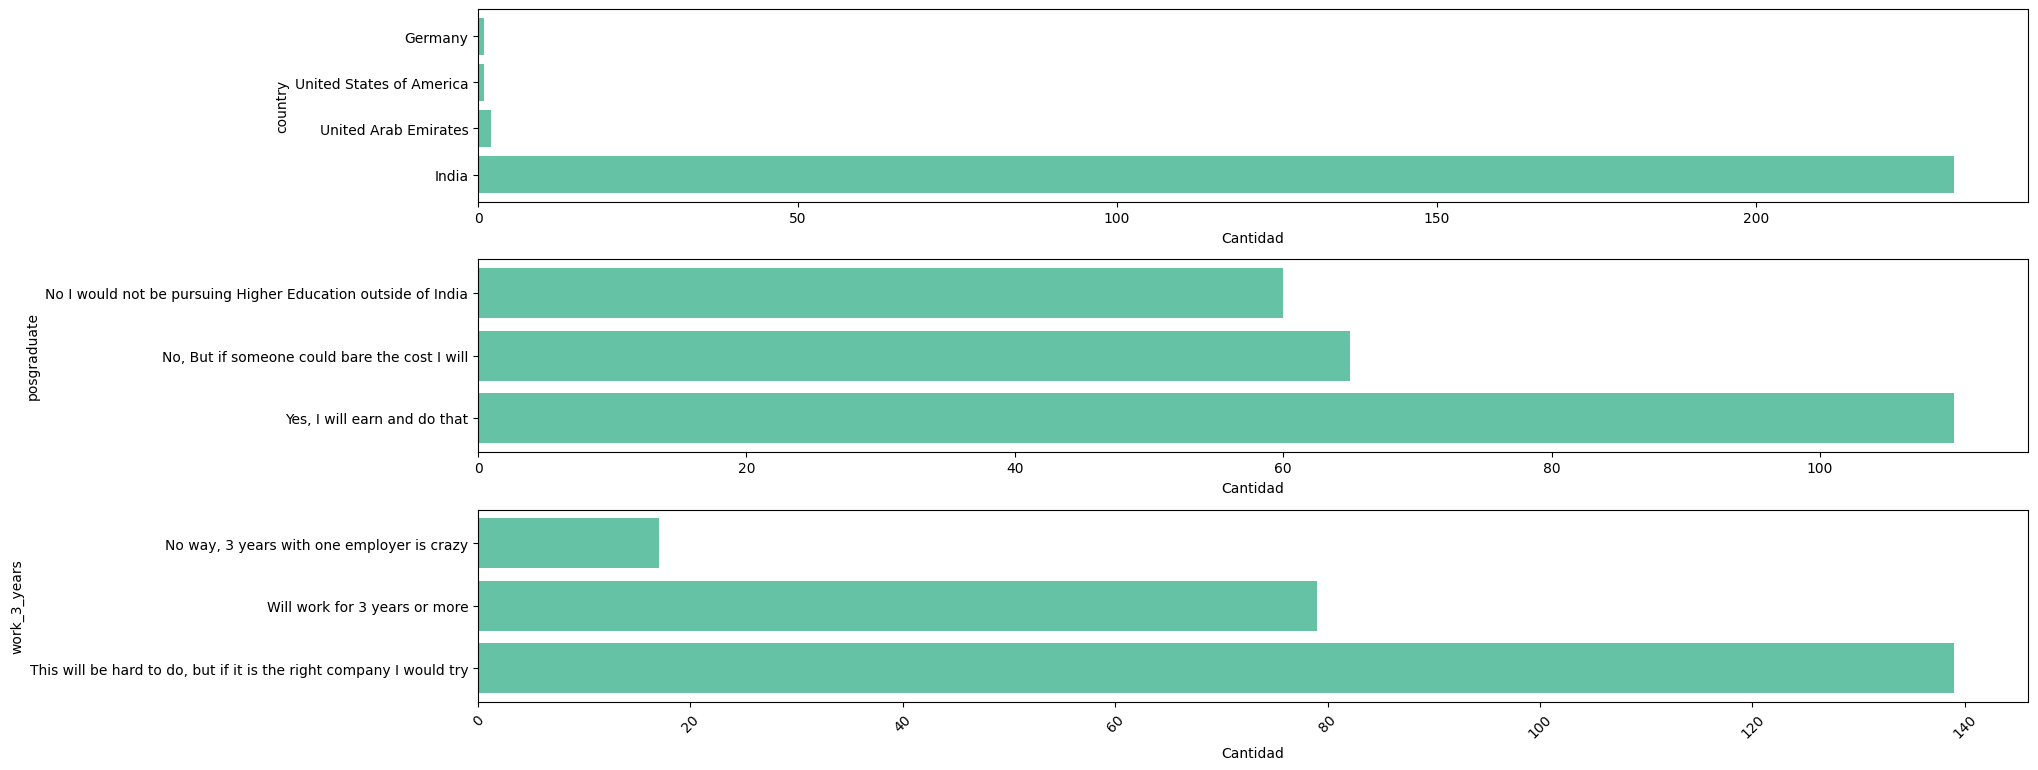

In [ ]:
# Select the columns
country = df1["country"]
posgraduate = df1["posgraduate"]
work_3_years = df1["work_3_years"]

# Create a dictionary for mapping categories (optional, but keeps code cleaner)
category_map = {
    "country": country.unique(),
    "posgraduate": posgraduate.unique(),
    "work_3_years": work_3_years.unique(),
}

# Configure the figure size
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 9))  # Change to nrows=3, ncols=1

# Create the subplot for each column
for i, column in enumerate(["country", "posgraduate", "work_3_years"]):
    categories = category_map.get(column, df1[column].unique())  # Handle potential missing key
    counts = df1[column].value_counts()

    # Swap X and Y for bar chart
    axes[i].barh(categories, counts)  # Use barh for horizontal bars
    axes[i].set_xlabel("Cantidad")
    axes[i].set_ylabel(column)

    # Optional: Rotate x-axis labels for better readability
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust space between subplots (optional)
plt.subplots_adjust(hspace=0.3)  # Adjust vertical space

# Show the figure
plt.show()

## Retroalimentación del demo day aplicado

En el siguiente apartado estoy agregando más Análisis Exploratorio de Datos a mi proyecto. Puesto que voy a tomar la retroalimentación dada por el coach David y epxloraré la variable type_aspirantions contestando a la pregunta inicial de ¿Qué ha pasado con las personas de la Generación Z? ¿A qué se quieren dedicar? y la columna type_aspirations tiene en su mayoría la respuesta a ello.

## Limpieza y lematización de la columna type_aspirations para contestar, ¿hacia dónde quiere ir yendo esta Generación Z con respecto a su trabajo?

In [ ]:
import re #función oficial
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    #Convert to lowercase
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', text)
    text = re.sub(r'[\n\t\r]', ' ', text)
    # Removes URLs
    text = re.sub(r'http\S+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove symbols and punctuation signs
    text = re.sub(r'[^\w\s]', ' ', text)

    # return processed_text
    return text

In [ ]:
df1['raw_text'] = df1['type_aspirations'].apply(preprocess_text)
df1['raw_text'].head(4)

0    business operations in any organization build ...
1    business operations in any organization build ...
2    manage and drive end to end projects or produc...
3    business operations in any organization manage...
Name: raw_text, dtype: object

In [ ]:
#word2vec con función de stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenizar(texto, idioma='en'):
    # Tokenize the text
    tokens = word_tokenize(texto)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df1['tokenized'] = df1['raw_text'].apply(tokenizar)
df1.tail(6)

,country,zip_code,gender,influence_to_study,posgraduate,work_3_years,company_mission,company_values,social_impact,working_environment,type_employers,type_learning,type_aspirations,type_manager,type_team,raw_text,tokenized
229,India,605101,Male,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",Yes,Will work for them,10,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Instructor or Exp...","Design and Creative strategy in any company, D...",Manager who sets targets and expects me to ach...,Work with 5 to 6 people in my team,design and creative strategy in any company de...,"[design, creative, strategy, company, design, ..."
230,India,605008,Male,"People from my circle, but not family members","Yes, I will earn and do that",Will work for 3 years or more,No,Will NOT work for them,7,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Learning by obser...","Design and Creative strategy in any company, B...",Manager who sets goal and helps me achieve it,Work with more than 10 people in my team,design and creative strategy in any company bu...,"[design, creative, strategy, company, business..."
231,India,722207,Male,"People from my circle, but not family members",No I would not be pursuing Higher Education ou...,"This will be hard to do, but if it is the righ...",Yes,Will work for them,5,Hybrid Working Environment with less than 3 da...,Employer who rewards learning and enables that...,"Learning by observing others, Trial and error ...","Business Operations in any organization, Look ...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team,business operations in any organization look d...,"[business, operation, organization, look, deep..."
232,India,604102,Female,People who have changed the world for better,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,4,Hybrid Working Environment with less than 10 d...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...","Design and Creative strategy in any company, B...",Manager who sets goal and helps me achieve it,Work with more than 10 people in my team,design and creative strategy in any company bu...,"[design, creative, strategy, company, business..."
233,India,122002,Male,People who have changed the world for better,"Yes, I will earn and do that","No way, 3 years with one employer is crazy",No,Will NOT work for them,7,Hybrid Working Environment with less than 15 d...,Employer who rewards learning and enables that...,"Self Paced Learning Portals, Instructor or Exp...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team,teaching in any of the institutes online or of...,"[teaching, institute, online, offline, manage,..."
234,India,605102,Female,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",Yes,Will work for them,5,Every Day Office Environment,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Desig...",Manager who sets targets and expects me to ach...,Work with 7 to 10 or more people in my team,business operations in any organization design...,"[business, operation, organization, design, de..."


In [ ]:
df3 = df1[['zip_code', 'tokenized']]
df3.head(4)

,zip_code,tokenized
0,273005,"[business, operation, organization, build, dev..."
1,851129,"[business, operation, organization, build, dev..."
2,123106,"[manage, drive, end, end, project, product, de..."
3,834003,"[business, operation, organization, manage, dr..."


## Unnest

In [ ]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
aspirations_tidy = df3.explode(column='tokenized')
# aspirations_tidy = aspirations_tidy.drop(columns='type_aspirations')
aspirations_tidy = aspirations_tidy.rename(columns={'tokenized':'token_word'})
aspirations_tidy.head(3)

,zip_code,token_word
0,273005,business
0,273005,operation
0,273005,organization


In [ ]:
aspirations_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2937 entries, 0 to 234
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zip_code    2937 non-null   int64 
 1   token_word  2937 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.8+ KB


## Frecuencia de las palabras + nube de palabras

In [ ]:
frecuencias = aspirations_tidy['token_word'].value_counts()
print(frecuencias)

token_word
design          160
end             160
develop         131
company         106
strategy        106
creative        106
look            103
deeply          103
data            103
generate        103
insight         103
business         95
organization     95
operation        95
drive            80
project          80
product          80
manage           80
build            77
team             77
work             74
teaching         66
offline          66
online           66
institute        66
way              61
freelancer       61
thing            61
software         54
amazing          54
creator          50
platform         50
content          50
become           50
bpo              13
setup            13
well             13
known            13
client           13
Name: count, dtype: int64


In [ ]:
#codigo aquí
!pip install wordcloud
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


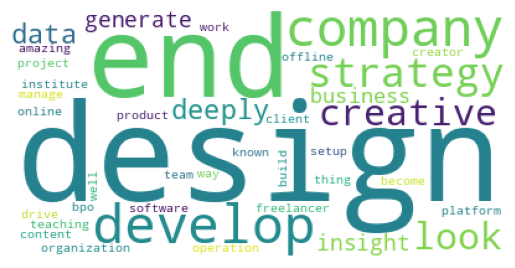

In [ ]:
from wordcloud import WordCloud

# wordcloud = WordCloud(background_color='white').generate(frecuencias.index.to_string())
wordcloud = WordCloud(background_color='white').generate(' '.join(frecuencias.index))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
eje_x = frecuencias.index.to_numpy()  # Obtener las palabras clave (tokens) como array
eje_y = frecuencias.to_numpy()  # Obtener las frecuencias como array

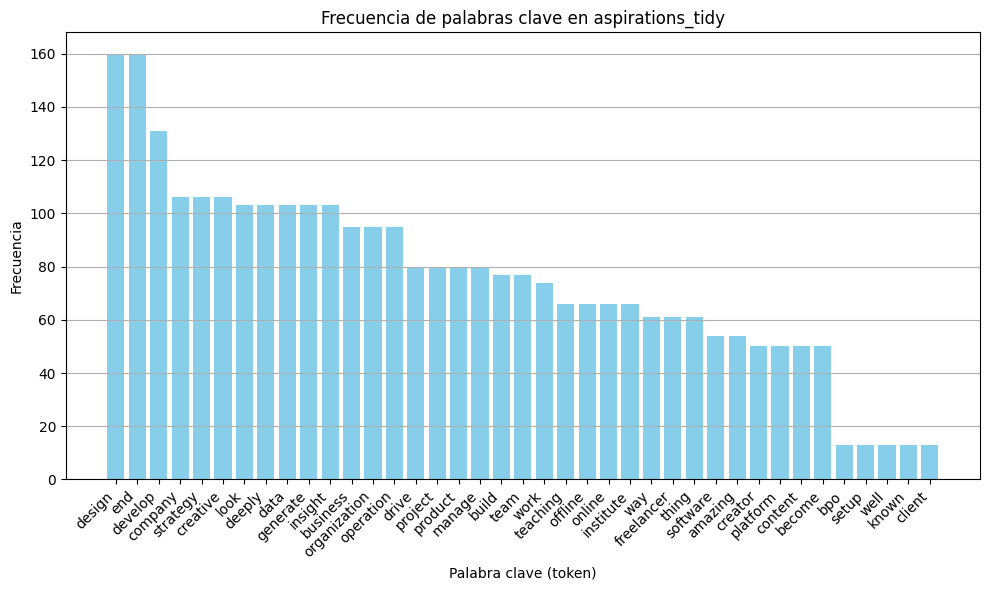

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico (opcional)
plt.bar(eje_x, eje_y, color='skyblue')  # Color de las barras (personalizable)
plt.xlabel("Palabra clave (token)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras clave en aspirations_tidy")
plt.xticks(rotation=45, ha='right')  # Rotar y alinear las etiquetas del eje x
plt.grid(axis='y')  # Agregar una rejilla en el eje y
plt.tight_layout()  # Ajustar el margen del gráfico

# Mostrar el gráfico
plt.show()

## Longitud media de las respuestas de aspiraciones

In [ ]:
#codigo aquí
# Longitud media y desviación de las respuestas de cada usuario
aspirations_tidy['token_word'].describe()

count       2937
unique        39
top       design
freq         160
Name: token_word, dtype: object

In [ ]:
df4 = pd.DataFrame(frecuencias)
df4

,count
token_word,
design,160
end,160
develop,131
company,106
strategy,106
creative,106
look,103
deeply,103
data,103


In [ ]:
df4.describe()

,count
count,39.000000
mean,75.307692
std,35.985490
min,13.000000
25%,54.000000
50%,77.000000
75%,103.000000
max,160.000000


## Dummies

Para poder pasar a procesar los datos, necesitamos convertirlos a número. Aquí estoy creando un dataframe con las variables que más me interesan:

In [ ]:
data = df1[["country", "posgraduate", "work_3_years", "working_environment", "type_employers", "type_learning", "type_manager"]]

df = pd.DataFrame(data)
df.tail(3)

,country,posgraduate,work_3_years,working_environment,type_employers,type_learning,type_manager
232,India,"Yes, I will earn and do that",Will work for 3 years or more,Hybrid Working Environment with less than 10 d...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Manager who sets goal and helps me achieve it
233,India,"Yes, I will earn and do that","No way, 3 years with one employer is crazy",Hybrid Working Environment with less than 15 d...,Employer who rewards learning and enables that...,"Self Paced Learning Portals, Instructor or Exp...","Manager who explains what is expected, sets a ..."
234,India,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",Every Day Office Environment,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Instructor or Exp...",Manager who sets targets and expects me to ach...


En este apartado, estamos creando etiquetas para las siguientes variables seleccionadas:

In [ ]:
# Realizar la codificación one-hot en una columna categórica
df = pd.get_dummies(df, columns=["country", "posgraduate", "work_3_years", "working_environment", "type_employers", "type_learning", "type_manager"])
df.head(3)

,country_Germany,country_India,country_United Arab Emirates,country_United States of America,posgraduate_No I would not be pursuing Higher Education outside of India,"posgraduate_No, But if someone could bare the cost I will","posgraduate_Yes, I will earn and do that","work_3_years_No way, 3 years with one employer is crazy","work_3_years_This will be hard to do, but if it is the right company I would try",work_3_years_Will work for 3 years or more,...,"type_learning_Instructor or Expert Learning Programs, Trial and error by doing side projects within the company","type_learning_Learning by observing others, Trial and error by doing side projects within the company","type_learning_Self Paced Learning Portals, Instructor or Expert Learning Programs","type_learning_Self Paced Learning Portals, Learning by observing others","type_learning_Self Paced Learning Portals, Trial and error by doing side projects within the company",type_manager_Manager who clearly describes what she/he needs,"type_manager_Manager who explains what is expected, sets a goal and helps achieve it",type_manager_Manager who sets goal and helps me achieve it,type_manager_Manager who sets targets and expects me to achieve it,type_manager_Manager who sets unrealistic targets
0,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


Verificamos el procesamiento de estos datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 32 columns):
 #   Column                                                                                                           Non-Null Count  Dtype
---  ------                                                                                                           --------------  -----
 0   country_Germany                                                                                                  235 non-null    uint8
 1   country_India                                                                                                    235 non-null    uint8
 2   country_United Arab Emirates                                                                                     235 non-null    uint8
 3   country_United States of America                                                                                 235 non-null    uint8
 4   posgraduate_No I would not be pursuing Higher Educ

Filtramos para comprobar que podemos acceder a estos datos

In [ ]:
df_filter = df[df['working_environment_Every Day Office Environment'] == 1]
df_filter.head(2)

,country_Germany,country_India,country_United Arab Emirates,country_United States of America,posgraduate_No I would not be pursuing Higher Education outside of India,"posgraduate_No, But if someone could bare the cost I will","posgraduate_Yes, I will earn and do that","work_3_years_No way, 3 years with one employer is crazy","work_3_years_This will be hard to do, but if it is the right company I would try",work_3_years_Will work for 3 years or more,...,"type_learning_Instructor or Expert Learning Programs, Trial and error by doing side projects within the company","type_learning_Learning by observing others, Trial and error by doing side projects within the company","type_learning_Self Paced Learning Portals, Instructor or Expert Learning Programs","type_learning_Self Paced Learning Portals, Learning by observing others","type_learning_Self Paced Learning Portals, Trial and error by doing side projects within the company",type_manager_Manager who clearly describes what she/he needs,"type_manager_Manager who explains what is expected, sets a goal and helps achieve it",type_manager_Manager who sets goal and helps me achieve it,type_manager_Manager who sets targets and expects me to achieve it,type_manager_Manager who sets unrealistic targets
9,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
17,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


En la filtración de arriba he comprobado que se han asignado a número las siguientes categorías:
 - 0 Germany - tenemos 2 personas alemanas
 - 1 India - 231 personas de la India
 - 2 Emiratos Árabes Unidos - 1 persona de EAU
 - 3 USA - 1 persona de USA

## Escala y train_split

In [ ]:
X = df.drop(columns=['working_environment_Every Day Office Environment',
                     'working_environment_Fully Remote with No option to visit offices',
                     'working_environment_Fully Remote with Options to travel as and when needed',
                     'working_environment_Hybrid Working Environment with less than 10 days a month at office',
                     'working_environment_Hybrid Working Environment with less than 15 days a month at office',
                     'working_environment_Hybrid Working Environment with less than 3 days a month at office',
                     'country_Germany',
                     'country_United Arab Emirates',
                     'country_United States of America',
                     ])
y = df[['working_environment_Every Day Office Environment',
      'working_environment_Fully Remote with No option to visit offices',
      'working_environment_Fully Remote with Options to travel as and when needed',
      'working_environment_Hybrid Working Environment with less than 10 days a month at office',
      'working_environment_Hybrid Working Environment with less than 15 days a month at office',
      'working_environment_Hybrid Working Environment with less than 3 days a month at office']] #variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(176, 23)
(176, 6)
(59, 23)


In [ ]:
#Estandarización
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#revisamos forma
X_train_scaled.shape

(176, 23)

## PCA

En este apartado aplicaremos Principal Component Analysis (PCA), para este caso me ha ayudado a encontrar valores atípicos. Mejor que una gráfica de bigotes.

In [ ]:
#Obteniendo los componentes principales
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_train_scaled)

In [ ]:
#crea dataframe con los componentes principales
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,1.080443,-0.795782
1,0.844693,-3.707708
2,-1.500082,0.481878
3,-1.175386,-0.019241
4,0.894763,1.903436


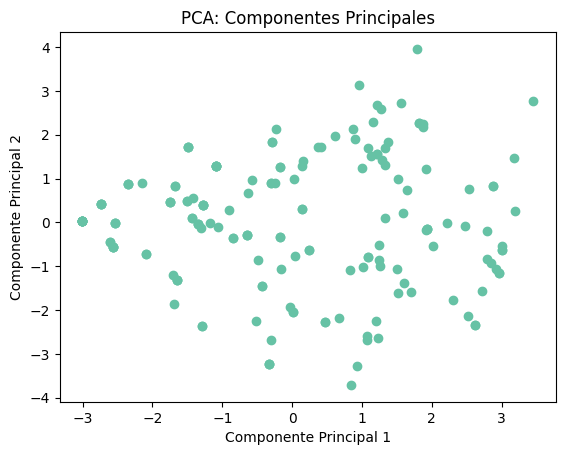

In [ ]:
#visualización 2-D
plt.scatter(pca_df['pca1'], pca_df['pca2'])
plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
#Obteniendo los componentes principales
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(X_train_scaled)

In [ ]:
#crea dataframe con los componentes principales
pca_df2 = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3'])
pca_df2.head()

,pca1,pca2,pca3
0,1.080443,-0.795782,-1.593846
1,0.844693,-3.707708,-1.497588
2,-1.500082,0.481878,1.020940
3,-1.175386,-0.019241,2.229917
4,0.894763,1.903436,-0.974664


Aplicar una gráfica 3D me ayuda a ver desde otra pespectiva que tan unidos están los datos entre sí.

In [ ]:
#Gráfica 3D con movimiento -- Aquí experimenté cómo se ve la gráfica con 3-D  si tuviera 3 componentes en el PCA -- Ingrid
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=pca_df2['pca1'],
    y=pca_df2['pca2'],
    z=pca_df2['pca3'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
    )
))

fig.update_layout(
    title="Gráfica 3D de componentes",
    scene=dict(
        xaxis=dict(title='Componente 1'),
        yaxis=dict(title='Componente 2'),
        zaxis=dict(title='Componente 3'),
    ),
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.25, y=1.25, z=1.25)
    ),
    width=800,
    height=800,

)

fig.show()

## Método del codo + K-MEANS

Antes de aplicar K-MEANS, el método del codo nos ayuda a encontrar una primera cantidad óptima de clusters. Es importante recordar que K-MEANS es un método que require de cálculos un poco más manuales, porque se ajustan a la necesidad de agrupamiento que se necesite.

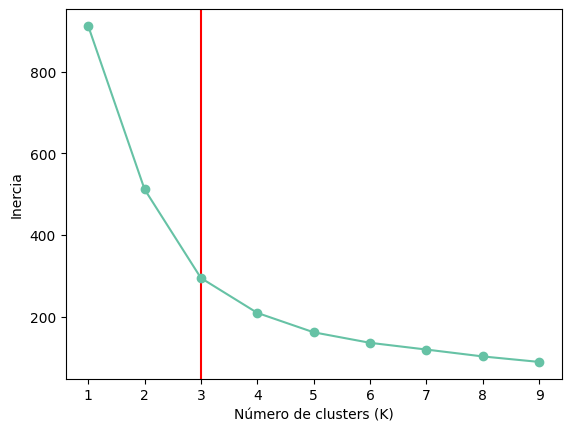

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de K
ks = range(1, 10)

# Lista para almacenar la inercia para cada valor de K
inercias = []

# Calcular la inercia para cada valor de K
for k in ks:
  # Ajustar el modelo KMeans
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pca_df)
  # Almacenar la inercia
  inercias.append(kmeans.inertia_)

# Graficar la curva del codo
plt.axvline(x=3, color='red', label="Punto máximo de inflexión")
plt.plot(ks, inercias, '-o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.show()

# Elegir K en el "codo" de la curva
k_optimo = ks[np.argmin(np.diff(inercias))]

In [ ]:
# Ajustar el modelo KMeans final con el K óptimo
kmeans_final = KMeans(n_clusters=k_optimo)
kmeans_final.fit(pca_df)

KMeans(n_clusters=1)

In [ ]:
#Instanciamos y entrenamos
kmeans = KMeans(3)
kmeans.fit(X_train)
labels = kmeans.labels_

In [ ]:
#Verificamos shape
kmeans.cluster_centers_.shape

(3, 23)

In [ ]:
#obtenemos el dataframe de los centroides
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,
                               columns=[X_train.columns])
cluster_centers

,country_India,posgraduate_No I would not be pursuing Higher Education outside of India,"posgraduate_No, But if someone could bare the cost I will","posgraduate_Yes, I will earn and do that","work_3_years_No way, 3 years with one employer is crazy","work_3_years_This will be hard to do, but if it is the right company I would try",work_3_years_Will work for 3 years or more,type_employers_Employer who appreciates learning and enables that environment,type_employers_Employer who pushes your limits and doesn't enables learning environment and never rewards you,"type_employers_Employer who pushes your limits by enabling an learning environment, and rewards you at the end",...,"type_learning_Instructor or Expert Learning Programs, Trial and error by doing side projects within the company","type_learning_Learning by observing others, Trial and error by doing side projects within the company","type_learning_Self Paced Learning Portals, Instructor or Expert Learning Programs","type_learning_Self Paced Learning Portals, Learning by observing others","type_learning_Self Paced Learning Portals, Trial and error by doing side projects within the company",type_manager_Manager who clearly describes what she/he needs,"type_manager_Manager who explains what is expected, sets a goal and helps achieve it",type_manager_Manager who sets goal and helps me achieve it,type_manager_Manager who sets targets and expects me to achieve it,type_manager_Manager who sets unrealistic targets
0,0.985075,0.164179,0.552239,0.283582,1.492537e-02,9.402985e-01,4.477612e-02,2.220446e-16,3.469447e-17,0.880597,...,0.283582,0.179104,0.19403,0.134328,0.059701,0.059701,0.910448,0.029851,-6.938894e-17,-1.734723e-17
1,0.968750,0.375000,0.062500,0.562500,1.250000e-01,-3.330669e-16,8.750000e-01,3.906250e-01,6.250000e-02,0.375000,...,0.156250,0.187500,0.21875,0.171875,0.062500,0.359375,0.375000,0.125000,1.093750e-01,3.125000e-02
2,0.977778,0.266667,0.088889,0.644444,2.775558e-17,1.000000e+00,-2.220446e-16,6.222222e-01,2.222222e-02,0.088889,...,0.133333,0.044444,0.40000,0.155556,0.155556,0.222222,0.288889,0.355556,1.111111e-01,2.222222e-02


In [ ]:
cluster_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 23 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   (country_India,)                                                                                                    3 non-null      float64
 1   (posgraduate_No I would not be pursuing Higher Education outside of India,)                                         3 non-null      float64
 2   (posgraduate_No, But if someone could bare the cost I will,)                                                        3 non-null      float64
 3   (posgraduate_Yes, I will earn and do that,)                                                                         3 non-null      float64
 4   (work_3_years_No way, 3 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [X_train.columns])
cluster_centers

,country_India,posgraduate_No I would not be pursuing Higher Education outside of India,"posgraduate_No, But if someone could bare the cost I will","posgraduate_Yes, I will earn and do that","work_3_years_No way, 3 years with one employer is crazy","work_3_years_This will be hard to do, but if it is the right company I would try",work_3_years_Will work for 3 years or more,type_employers_Employer who appreciates learning and enables that environment,type_employers_Employer who pushes your limits and doesn't enables learning environment and never rewards you,"type_employers_Employer who pushes your limits by enabling an learning environment, and rewards you at the end",...,"type_learning_Instructor or Expert Learning Programs, Trial and error by doing side projects within the company","type_learning_Learning by observing others, Trial and error by doing side projects within the company","type_learning_Self Paced Learning Portals, Instructor or Expert Learning Programs","type_learning_Self Paced Learning Portals, Learning by observing others","type_learning_Self Paced Learning Portals, Trial and error by doing side projects within the company",type_manager_Manager who clearly describes what she/he needs,"type_manager_Manager who explains what is expected, sets a goal and helps achieve it",type_manager_Manager who sets goal and helps me achieve it,type_manager_Manager who sets targets and expects me to achieve it,type_manager_Manager who sets unrealistic targets
0,1.124081,0.339681,0.496593,0.618917,0.054424,1.071482,0.356365,0.301136,0.028409,0.934588,...,0.312054,0.211279,0.340326,0.201819,0.101897,0.234554,1.009093,0.158319,0.068182,0.017045
1,1.121648,0.432952,0.282947,0.758232,0.078671,0.613636,0.748288,0.480336,0.038793,0.681806,...,0.261230,0.214258,0.351110,0.215350,0.102678,0.356662,0.743104,0.192081,0.095751,0.021090
2,1.122994,0.385023,0.294459,0.799162,0.051136,1.100552,0.335227,0.586582,0.032101,0.538760,...,0.252083,0.163497,0.430179,0.209468,0.128661,0.300776,0.700327,0.273889,0.096188,0.019922


In [ ]:
cluster_centers.shape

(3, 23)

## Gráfica de KMEANS

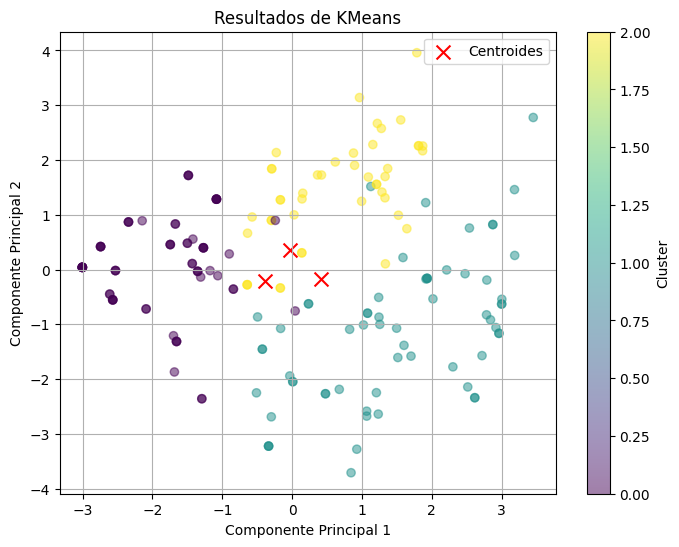

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensionalidad para graficar en 2D
pca = PCA(n_components=2)
pca.fit(pca_df)
pca_features = pca.transform(pca_df)

# Graficar los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de KMeans')
plt.colorbar(label='Cluster')
plt.grid(True)

# Graficar los centroides
cluster_centers_pca = pca.fit_transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', s=100, c='r', label='Centroides')
plt.legend()
plt.show()


Aquí los tres clusters que asignamos, nos muestran una dispersión correcta visualmente. Sin embargo, es importante observar las métricas también para evaluar la calidad de estos clusters.

## Métricas y evaluación del modelo

El método de Silueta se encuentra entre -1, 0 y 1.
Donde 1 significa un cluster bien asignado, -1 que no está bien asignado y 0 que no es tampoco muy bueno.

In [ ]:
#Método de silueta
score = silhouette_score(X_train, labels, metric='euclidean')
print(f'El coeficiente de silueta es de {score}.')

El coeficiente de silueta es de 0.1441967095386129.


En cuanto mayor sea el valor de Calinski-Harabasz, más separados y distintos son los clústeres entre sí.

In [ ]:
#método calinski_harabasz
ch_score = calinski_harabasz_score(X_train, labels)
print(f'El coeficiente del índice Calinski-Harabasz es de {ch_score}.')

El coeficiente del índice Calinski-Harabasz es de 27.257818314409462.


Cuanto más bajo sea el valor de Davies-Bouldin, más separados y distintos son los clústeres entre sí.

In [ ]:
db_score = davies_bouldin_score(X_train, labels)
print(f'El coeficiente del índice Davies-Bouldin es de {db_score}.')

El coeficiente del índice Davies-Bouldin es de 2.2118361877692108.


## Método DBSCAN

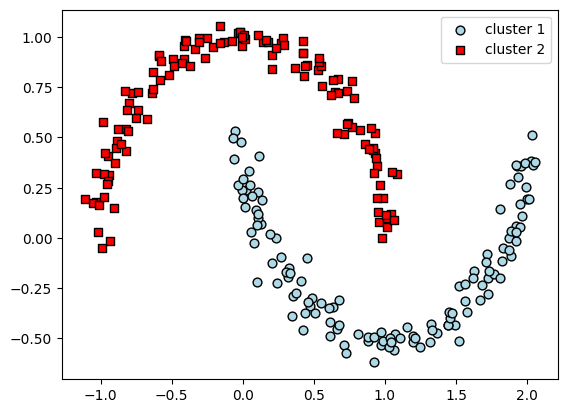

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X_train_scaled)

plt.scatter(X_train_scaled[y_db==0,0],
            X_train_scaled[y_db==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X_train_scaled[y_db==1,0],
            X_train_scaled[y_db==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

plt.legend()
plt.show()

A diferencia del método K-MEANS, el método DBSCAN me ayuda a entender más la forma y el cluster de manera visual-espacial.

Podemos observar que tenemos datos que aunque ya están en un cluster asignado, pueden todavía no tener mucha relación al cluster que fueron asignado.

Las dispersiones no son drásticas para ningún tipo de media luna, pero esto puede ayudar a explicar aquellos datos que son diferentes.

In [ ]:
silhouette_avg = silhouette_score(X_train_scaled, y_db)

print("El promedio del índice de silueta es:", silhouette_avg)

El promedio del índice de silueta es: 0.3273897407904313


In [ ]:
#método calinski_harabasz
ch_score_2 = calinski_harabasz_score(X_train_scaled, labels)
print(f'El coeficiente del índice Calinski-Harabasz es de {ch_score_2}.')

El coeficiente del índice Calinski-Harabasz es de 1.291623476453577.


In [ ]:
db_score_2 = davies_bouldin_score(X_train_scaled, labels)
print(f'El coeficiente del índice Davies-Bouldin es de {db_score_2}.')

El coeficiente del índice Davies-Bouldin es de 14.78632139962156.


# Lineamientos del proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**